# Exercise 01 : Line chart with styles

In [1]:
import pandas as pd
import sqlite3

make a connection to the database

In [2]:
try:
    connection = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
    print("Successfully connect to the database")
except sqlite3.Error as error:
    print("Error when connecting to the database", error)

Successfully connect to the database


## • analyze only the users and not the admins
## • analyze only the dates when there were both views and checker commits
## • use size of the font should be 8
## • the size of the ﬁgure is (15,8)

In [3]:
query1 = "select uid, datetime from pageviews where uid like 'user_%'"
views = pd.io.sql.read_sql(query1, connection, parse_dates=['datetime'])
views.head(10)

,uid,datetime
0,user_30,2020-04-17 22:46:26.785035
1,user_14,2020-04-18 10:53:52.623447
2,user_17,2020-04-18 10:56:55.833899
3,user_14,2020-04-18 10:57:37.331258
4,user_17,2020-04-18 12:05:48.200144
5,user_17,2020-04-18 12:06:13.237290
6,user_17,2020-04-18 12:06:35.574114
7,user_10,2020-04-18 12:19:50.182714
8,user_14,2020-04-18 18:14:53.813657
9,user_14,2020-04-18 18:20:05.419381


In [4]:
query2 = "select uid, timestamp from checker where uid like 'user_%'"
commits = pd.io.sql.read_sql(query2, connection, parse_dates=['timestamp'])
commits.head(10)

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
5,user_4,2020-04-17 05:43:18.546760
6,user_4,2020-04-17 05:43:27.773992
7,user_4,2020-04-17 05:46:22.151752
8,user_4,2020-04-17 05:46:32.275104
9,user_4,2020-04-17 05:50:17.757425


In [5]:
df_views = views['datetime'].dt.floor('D').value_counts().rename_axis('date').reset_index(name='views').set_index('date')
df_views

,views
date,
2020-05-11,200
2020-05-14,187
2020-05-10,110
2020-05-13,102
2020-05-12,85
2020-05-18,51
2020-05-08,48
2020-05-15,29
2020-04-18,23


In [6]:
df_commits = commits['timestamp'].dt.floor('D').value_counts().rename_axis('date').reset_index(name='commits').set_index('date')
df_commits

,commits
date,
2020-05-14,575
2020-05-12,323
2020-04-26,261
2020-05-02,242
2020-05-13,211
2020-05-11,186
2020-05-03,180
2020-05-10,143
2020-05-05,139


In [7]:
# df = pd.concat([df_views, df_commits], axis=1, join='inner')
df = pd.merge(df_views, df_commits, on='date', how='inner')
df

,views,commits
date,,
2020-05-11,200,186
2020-05-14,187,575
2020-05-10,110,143
2020-05-13,102,211
2020-05-12,85,323
2020-05-18,51,3
2020-05-08,48,87
2020-05-15,29,10
2020-04-18,23,69


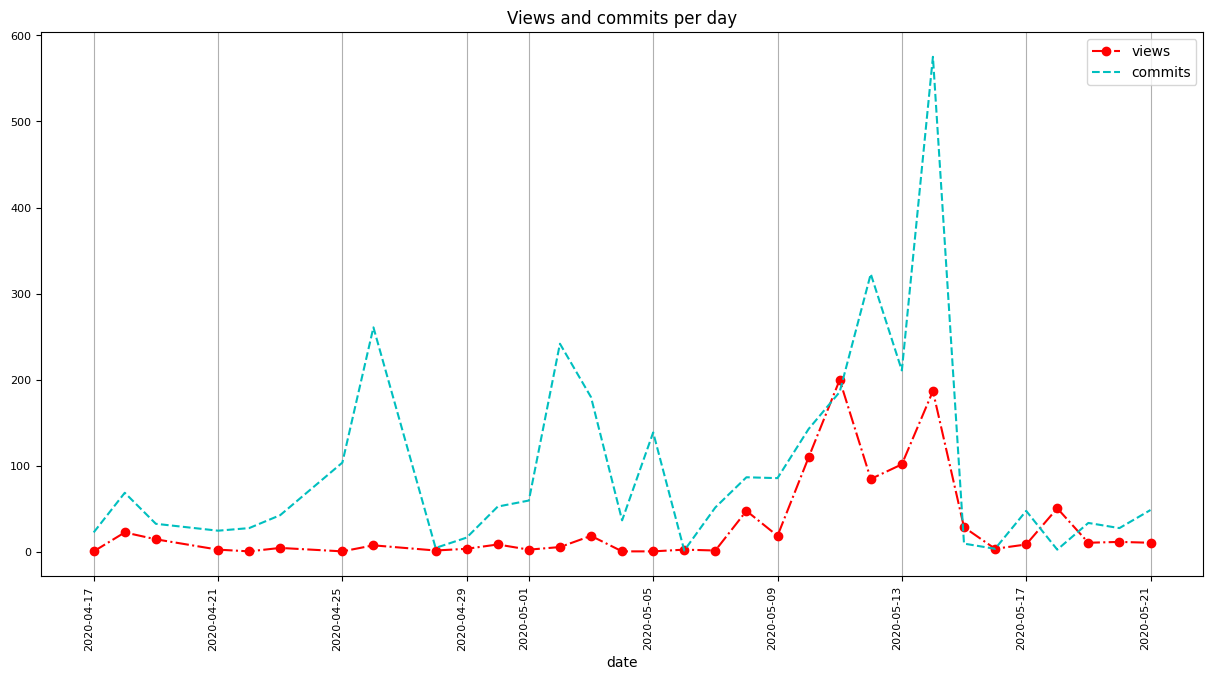

In [8]:
df.plot(fontsize=8, figsize=(15,8), title='Views and commits per day', rot=90, color=['r', 'c'], style=['o-.', '--']).grid(axis='x')

## • at the end of your Jupyter Notebook create a markdown cell and insert the question: “How many times was the number of views larger than 150?” Insert: “The answer is ___”. Put the number in the text instead of the underline.

In [9]:
df[df['views'] > 150]

,views,commits
date,,
2020-05-11,200,186
2020-05-14,187,575


### Answer: “The answer is 2”

close the connection to the database

In [10]:
connection.close()